In [4]:
pip install spacy



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.9 MB 262.6 kB/s eta 0:00:53
   ---------------------------------------- 0.0/13.9 MB 281.8 kB/s eta 0:00:50
   ---------------------------------------- 0.1/13.9 MB 272.3 kB/s eta 0:00:51
   ---------------------------------------- 0.1/13.9 MB 393.8 kB/s eta 0:00:36
   ---------------------------------------- 0.1/13.9 MB 400.9 kB/s eta 0:00:35
   ---------------------------------------- 0

In [2]:
pip install sentence-transformers


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 330.3 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 253.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     -------------------------------------- 41.5/41.5 kB 504.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/483.4 kB ? eta -:--:--
    --------------------------------------- 10.2/483.4 kB ? eta -:--:--
    --------------------------------------- 10.2/483.4 kB ? eta -:--:--
    --------------------------------------- 10.2/483.4 kB ? eta -:--:--
    --------------------------------------- 10.2/483.4 kB ? eta -:--:--
    ---------------------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


⚠️ openai non installé pour les embeddings GPT. Utilisez: pip install openai
=== TEST AVEC EMBEDDINGS ===

✅ Modèle distiluse-base-multilingual-cased chargé avec succès
Score de similarité: 75.5%
Niveau: Très bonne

=== RAPPORT DE SIMILARITÉ AVEC EMBEDDINGS ===

📊 SCORE GLOBAL: 75.5% (Très bonne)
🤖 MODÈLE UTILISÉ: SENTENCE_TRANSFORMER

📈 SCORES PAR SECTION:
• Similarité globale: 80.5999984741211%
• Compétences: 72.12000274658203%
• Expérience: 35.70000076293945%
• Éducation: 62.54999923706055%

🎯 ANALYSE DES COMPÉTENCES:
• Similarité moyenne: 90.44%
• Couverture des compétences: 83.33%

🔍 TOP CORRESPONDANCES DE COMPÉTENCES:
• 'Python' → 'Python' (100.0%)
• 'React' → 'React' (100.0%)
• 'Machine Learning' → 'Machine Learning' (100.0%)
• 'SQL' → 'SQL' (100.0%)
• 'Git' → 'Git' (100.0%)

⚖️ PONDÉRATION APPLIQUÉE:
• Texte global: 40.0%
• Compétences: 35.0%
• Expérience: 15.0%
• Éducation: 10.0%

💡 RECOMMANDATION:
🎉 Excellent match - Candidat hautement recommandé


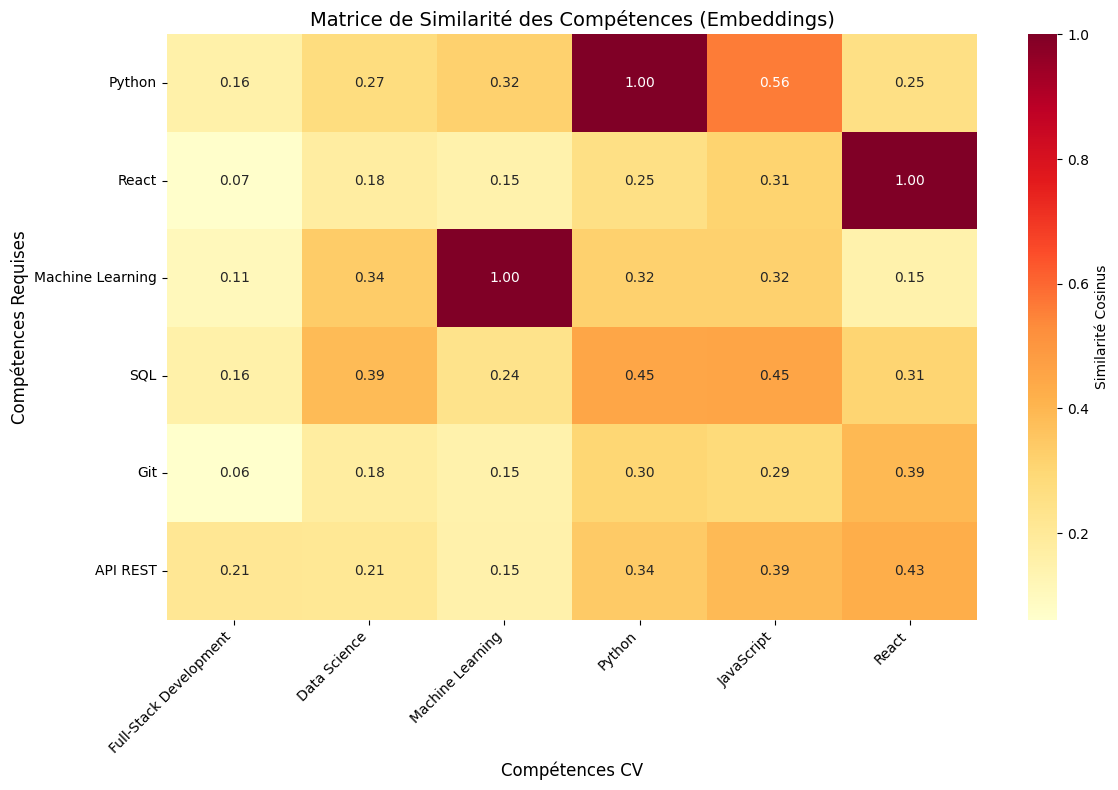

In [3]:
import json
import numpy as np
from typing import Dict, List, Tuple, Optional
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Pour les embeddings pré-entraînés
try:
    from sentence_transformers import SentenceTransformer
    SENTENCE_TRANSFORMERS_AVAILABLE = True
except ImportError:
    SENTENCE_TRANSFORMERS_AVAILABLE = False
    print("⚠️ sentence-transformers non installé. Utilisez: pip install sentence-transformers")

try:
    import openai
    OPENAI_AVAILABLE = True
except ImportError:
    OPENAI_AVAILABLE = False
    print("⚠️ openai non installé pour les embeddings GPT. Utilisez: pip install openai")

try:
    import torch
    from transformers import AutoTokenizer, AutoModel
    TRANSFORMERS_AVAILABLE = True
except ImportError:
    TRANSFORMERS_AVAILABLE = False
    print("⚠️ transformers non installé. Utilisez: pip install transformers torch")

class CVJobEmbeddingSimilarity:
    def __init__(self, model_type: str = "sentence_transformer"):
        """
        model_type options:
        - "sentence_transformer": Utilise SentenceTransformer (recommandé)
        - "openai": Utilise OpenAI embeddings (nécessite API key)
        - "camembert": Utilise CamemBERT (français)
        - "multilingual": Utilise un modèle multilingue
        """
        self.model_type = model_type
        self.model = None
        self.tokenizer = None
        
        self._load_model()
        
        # Poids pour combiner différents types de similarité
        self.weights = {
            'global_similarity': 0.4,
            'skills_similarity': 0.35,
            'experience_similarity': 0.15,
            'education_similarity': 0.1
        }

    def _load_model(self):
        """Charge le modèle d'embeddings selon le type choisi"""
        if self.model_type == "sentence_transformer" and SENTENCE_TRANSFORMERS_AVAILABLE:
            # Modèles recommandés selon le cas d'usage
            models = {
                'multilingual': 'distiluse-base-multilingual-cased',
                'english': 'all-MiniLM-L6-v2',
                'french': 'dangvantuan/sentence-camembert-large'
            }
            try:
                self.model = SentenceTransformer(models['multilingual'])
                print(f"✅ Modèle {models['multilingual']} chargé avec succès")
            except:
                try:
                    self.model = SentenceTransformer(models['english'])
                    print(f"✅ Modèle {models['english']} chargé avec succès")
                except:
                    print("❌ Impossible de charger un modèle SentenceTransformer")
                    
        elif self.model_type == "camembert" and TRANSFORMERS_AVAILABLE:
            try:
                model_name = "camembert-base"
                self.tokenizer = AutoTokenizer.from_pretrained(model_name)
                self.model = AutoModel.from_pretrained(model_name)
                print(f"✅ Modèle {model_name} chargé avec succès")
            except:
                print("❌ Impossible de charger CamemBERT")
                
        elif self.model_type == "openai" and OPENAI_AVAILABLE:
            # Note: nécessite d'avoir configuré OPENAI_API_KEY
            print("✅ Configuration OpenAI prête (vérifiez votre API key)")
        else:
            print("❌ Type de modèle non disponible ou dépendances manquantes")

    def extract_sections_from_cv(self, cv_data: Dict) -> Dict[str, str]:
        """Extrait les différentes sections du CV en texte"""
        sections = {}
        
        # Section compétences
        if 'skills' in cv_data:
            sections['skills'] = ' '.join(cv_data['skills'])
        
        # Section expérience
        experience_texts = []
        if 'experience' in cv_data:
            for exp in cv_data['experience']:
                exp_text = f"{exp.get('job_title', '')} {exp.get('description', '')}"
                experience_texts.append(exp_text)
        sections['experience'] = ' '.join(experience_texts)
        
        # Section éducation
        education_texts = []
        if 'education' in cv_data:
            for edu in cv_data['education']:
                edu_text = f"{edu.get('degree', '')} {edu.get('institution_name', '')}"
                education_texts.append(edu_text)
        sections['education'] = ' '.join(education_texts)
        
        # Section certifications
        if 'certifications' in cv_data:
            sections['certifications'] = ' '.join(cv_data['certifications'])
        
        # Texte global
        all_texts = [sections.get(key, '') for key in sections.keys()]
        sections['global'] = ' '.join(filter(None, all_texts))
        
        return sections

    def extract_sections_from_job(self, job_data: Dict) -> Dict[str, str]:
        """Extrait les différentes sections de l'offre d'emploi"""
        sections = {}
        
        # Compétences requises
        if 'required_skills' in job_data:
            if isinstance(job_data['required_skills'], list):
                sections['skills'] = ' '.join(job_data['required_skills'])
            else:
                sections['skills'] = job_data['required_skills']
        
        # Expérience requise
        sections['experience'] = job_data.get('experience_required', '')
        
        # Éducation requise
        sections['education'] = job_data.get('education_required', '')
        
        # Description globale
        description_parts = [
            job_data.get('title', ''),
            job_data.get('description', ''),
            sections.get('skills', ''),
            sections.get('experience', ''),
            sections.get('education', '')
        ]
        sections['global'] = ' '.join(filter(None, description_parts))
        
        return sections

    def get_sentence_transformer_embeddings(self, texts: List[str]) -> np.ndarray:
        """Génère les embeddings avec SentenceTransformer"""
        if self.model is None:
            raise ValueError("Modèle SentenceTransformer non chargé")
        
        # Nettoyer les textes
        cleaned_texts = [text.strip() for text in texts if text.strip()]
        
        if not cleaned_texts:
            return np.array([])
        
        embeddings = self.model.encode(cleaned_texts, convert_to_tensor=False)
        return embeddings

    def get_camembert_embeddings(self, texts: List[str]) -> np.ndarray:
        """Génère les embeddings avec CamemBERT"""
        if self.model is None or self.tokenizer is None:
            raise ValueError("Modèle CamemBERT non chargé")
        
        embeddings = []
        
        for text in texts:
            if not text.strip():
                continue
                
            # Tokenizer et encoder
            inputs = self.tokenizer(text, return_tensors='pt', truncation=True, 
                                  padding=True, max_length=512)
            
            with torch.no_grad():
                outputs = self.model(**inputs)
                # Utiliser la moyenne des embeddings des tokens
                embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
                embeddings.append(embedding)
        
        return np.array(embeddings) if embeddings else np.array([])

    def get_openai_embeddings(self, texts: List[str], model: str = "text-embedding-3-small") -> np.ndarray:
        """Génère les embeddings avec OpenAI API"""
        if not OPENAI_AVAILABLE:
            raise ValueError("OpenAI non disponible")
        
        embeddings = []
        
        for text in texts:
            if not text.strip():
                continue
            
            try:
                response = openai.embeddings.create(
                    input=text,
                    model=model
                )
                embedding = response.data[0].embedding
                embeddings.append(embedding)
            except Exception as e:
                print(f"❌ Erreur OpenAI API: {e}")
                # Fallback avec des embeddings aléatoires (pour test)
                embeddings.append(np.random.randn(1536))
        
        return np.array(embeddings) if embeddings else np.array([])

    def generate_embeddings(self, texts: List[str]) -> np.ndarray:
        """Génère les embeddings selon le type de modèle choisi"""
        if self.model_type == "sentence_transformer":
            return self.get_sentence_transformer_embeddings(texts)
        elif self.model_type == "camembert":
            return self.get_camembert_embeddings(texts)
        elif self.model_type == "openai":
            return self.get_openai_embeddings(texts)
        else:
            raise ValueError(f"Type de modèle non supporté: {self.model_type}")

    def calculate_sectional_similarity(self, cv_data: Dict, job_data: Dict) -> Dict:
        """Calcule la similarité section par section"""
        cv_sections = self.extract_sections_from_cv(cv_data)
        job_sections = self.extract_sections_from_job(job_data)
        
        similarities = {}
        
        # Comparer chaque section
        for section in ['skills', 'experience', 'education', 'global']:
            cv_text = cv_sections.get(section, '')
            job_text = job_sections.get(section, '')
            
            if not cv_text or not job_text:
                similarities[section] = 0.0
                continue
            
            try:
                # Générer les embeddings
                embeddings = self.generate_embeddings([cv_text, job_text])
                
                if len(embeddings) == 2:
                    # Calculer la similarité cosinus
                    similarity = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
                    similarities[section] = max(0, similarity)  # Éviter les valeurs négatives
                else:
                    similarities[section] = 0.0
                    
            except Exception as e:
                print(f"⚠️ Erreur pour la section {section}: {e}")
                similarities[section] = 0.0
        
        return similarities

    def calculate_skill_embedding_similarity(self, cv_skills: List[str], job_skills: List[str]) -> Dict:
        """Calcule la similarité des compétences individuelles avec embeddings"""
        if not cv_skills or not job_skills:
            return {
                'average_similarity': 0.0,
                'max_similarity': 0.0,
                'skill_matches': [],
                'coverage': 0.0
            }
        
        try:
            # Générer embeddings pour toutes les compétences
            all_skills = cv_skills + job_skills
            embeddings = self.generate_embeddings(all_skills)
            
            if len(embeddings) != len(all_skills):
                return {'average_similarity': 0.0, 'max_similarity': 0.0, 'skill_matches': [], 'coverage': 0.0}
            
            # Séparer les embeddings
            cv_embeddings = embeddings[:len(cv_skills)]
            job_embeddings = embeddings[len(cv_skills):]
            
            # Calculer la matrice de similarité
            similarity_matrix = cosine_similarity(job_embeddings, cv_embeddings)
            
            # Pour chaque compétence job, trouver la meilleure correspondance CV
            skill_matches = []
            similarities = []
            
            for i, job_skill in enumerate(job_skills):
                best_cv_idx = np.argmax(similarity_matrix[i])
                best_similarity = similarity_matrix[i][best_cv_idx]
                best_cv_skill = cv_skills[best_cv_idx]
                
                skill_matches.append({
                    'job_skill': job_skill,
                    'matched_cv_skill': best_cv_skill,
                    'similarity': float(best_similarity)
                })
                similarities.append(best_similarity)
            
            # Calculer les métriques
            average_sim = np.mean(similarities)
            max_sim = np.max(similarities)
            
            # Coverage (compétences avec similarité > seuil)
            threshold = 0.7
            high_similarity_count = sum(1 for s in similarities if s > threshold)
            coverage = high_similarity_count / len(job_skills)
            
            return {
                'average_similarity': float(average_sim),
                'max_similarity': float(max_sim),
                'skill_matches': skill_matches,
                'coverage': float(coverage),
                'similarity_matrix': similarity_matrix.tolist()
            }
            
        except Exception as e:
            print(f"⚠️ Erreur dans skill_embedding_similarity: {e}")
            return {'average_similarity': 0.0, 'max_similarity': 0.0, 'skill_matches': [], 'coverage': 0.0}

    def calculate_comprehensive_embedding_similarity(self, cv_data: Dict, job_data: Dict) -> Dict:
        """Calcule un score de similarité complet basé sur les embeddings"""
        
        # 1. Similarité section par section
        sectional_similarities = self.calculate_sectional_similarity(cv_data, job_data)
        
        # 2. Similarité détaillée des compétences
        skill_analysis = self.calculate_skill_embedding_similarity(
            cv_data.get('skills', []), 
            job_data.get('required_skills', [])
        )
        
        # 3. Calculer le score composite
        composite_score = (
            sectional_similarities.get('global', 0) * self.weights['global_similarity'] +
            skill_analysis.get('average_similarity', 0) * self.weights['skills_similarity'] +
            sectional_similarities.get('experience', 0) * self.weights['experience_similarity'] +
            sectional_similarities.get('education', 0) * self.weights['education_similarity']
        )
        
        # Convertir en pourcentage
        composite_score_pct = composite_score * 100
        
        # Déterminer le niveau
        if composite_score_pct >= 85:
            level = "Excellente"
        elif composite_score_pct >= 70:
            level = "Très bonne"
        elif composite_score_pct >= 55:
            level = "Bonne"
        elif composite_score_pct >= 40:
            level = "Modérée"
        else:
            level = "Faible"
        
        return {
            'overall_similarity_score': round(composite_score_pct, 2),
            'similarity_level': level,
            'model_used': self.model_type,
            'sectional_scores': {
                'global_text': round(sectional_similarities.get('global', 0) * 100, 2),
                'skills': round(sectional_similarities.get('skills', 0) * 100, 2),
                'experience': round(sectional_similarities.get('experience', 0) * 100, 2),
                'education': round(sectional_similarities.get('education', 0) * 100, 2)
            },
            'skill_analysis': {
                'average_skill_similarity': round(skill_analysis.get('average_similarity', 0) * 100, 2),
                'skill_coverage': round(skill_analysis.get('coverage', 0) * 100, 2),
                'top_skill_matches': skill_analysis.get('skill_matches', [])[:5]
            },
            'weights_applied': self.weights
        }

    def visualize_similarity_matrix(self, cv_skills: List[str], job_skills: List[str], 
                                  save_path: Optional[str] = None):
        """Visualise la matrice de similarité des compétences"""
        skill_analysis = self.calculate_skill_embedding_similarity(cv_skills, job_skills)
        
        if 'similarity_matrix' not in skill_analysis:
            print("❌ Impossible de générer la visualisation")
            return
        
        similarity_matrix = np.array(skill_analysis['similarity_matrix'])
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(similarity_matrix, 
                   xticklabels=cv_skills, 
                   yticklabels=job_skills,
                   annot=True, 
                   cmap='YlOrRd', 
                   fmt='.2f',
                   cbar_kws={'label': 'Similarité Cosinus'})
        
        plt.title('Matrice de Similarité des Compétences (Embeddings)', fontsize=14)
        plt.xlabel('Compétences CV', fontsize=12)
        plt.ylabel('Compétences Requises', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

    def compare_multiple_models(self, cv_data: Dict, job_data: Dict) -> Dict:
        """Compare les résultats de différents modèles d'embeddings"""
        results = {}
        
        original_model_type = self.model_type
        
        # Tester différents modèles si disponibles
        models_to_test = []
        if SENTENCE_TRANSFORMERS_AVAILABLE:
            models_to_test.append("sentence_transformer")
        if TRANSFORMERS_AVAILABLE:
            models_to_test.append("camembert")
        if OPENAI_AVAILABLE:
            models_to_test.append("openai")
        
        for model_type in models_to_test:
            try:
                self.model_type = model_type
                self._load_model()
                
                result = self.calculate_comprehensive_embedding_similarity(cv_data, job_data)
                results[model_type] = result
                
            except Exception as e:
                print(f"⚠️ Erreur avec le modèle {model_type}: {e}")
                results[model_type] = {'error': str(e)}
        
        # Restaurer le modèle original
        self.model_type = original_model_type
        self._load_model()
        
        return results

    def generate_detailed_report(self, cv_data: Dict, job_data: Dict) -> str:
        """Génère un rapport détaillé avec embeddings"""
        result = self.calculate_comprehensive_embedding_similarity(cv_data, job_data)
        
        report = f"""
=== RAPPORT DE SIMILARITÉ AVEC EMBEDDINGS ===

📊 SCORE GLOBAL: {result['overall_similarity_score']}% ({result['similarity_level']})
🤖 MODÈLE UTILISÉ: {result['model_used'].upper()}

📈 SCORES PAR SECTION:
• Similarité globale: {result['sectional_scores']['global_text']}%
• Compétences: {result['sectional_scores']['skills']}%
• Expérience: {result['sectional_scores']['experience']}%
• Éducation: {result['sectional_scores']['education']}%

🎯 ANALYSE DES COMPÉTENCES:
• Similarité moyenne: {result['skill_analysis']['average_skill_similarity']}%
• Couverture des compétences: {result['skill_analysis']['skill_coverage']}%

🔍 TOP CORRESPONDANCES DE COMPÉTENCES:"""
        
        for match in result['skill_analysis']['top_skill_matches']:
            similarity_pct = match['similarity'] * 100
            report += f"\n• '{match['job_skill']}' → '{match['matched_cv_skill']}' ({similarity_pct:.1f}%)"
        
        report += f"""

⚖️ PONDÉRATION APPLIQUÉE:
• Texte global: {result['weights_applied']['global_similarity']*100}%
• Compétences: {result['weights_applied']['skills_similarity']*100}%
• Expérience: {result['weights_applied']['experience_similarity']*100}%
• Éducation: {result['weights_applied']['education_similarity']*100}%

💡 RECOMMANDATION:
{'🎉 Excellent match - Candidat hautement recommandé' if result['overall_similarity_score'] >= 70 else 
 '✅ Bon candidat - À considérer sérieusement' if result['overall_similarity_score'] >= 55 else 
 '⚠️ Match modéré - Évaluation approfondie requise' if result['overall_similarity_score'] >= 40 else 
 '❌ Faible correspondance - Autres candidats à privilégier'}
        """
        
        return report.strip()


# Exemple d'utilisation et tests
if __name__ == "__main__":
    # Données de test
    cv_data = {
        "name": "IGROU NIDAL",
        "skills": [
            "Full-Stack Development", "Data Science", "Machine Learning",
            "Python", "JavaScript", "React", "SQL", "Git", "Spring Boot"
        ],
        "education": [
            {
                "degree": "Master Intelligence Artificielle et Informatique Digitale",
                "institution_name": "Faculté des Sciences et Techniques, Béni Mellal"
            }
        ],
        "experience": [
            {
                "job_title": "Développeur Web Full-Stack",
                "description": "Développement d'applications web modernes avec Python, React et bases de données SQL"
            }
        ],
        "certifications": ["AI Fundamentals", "Data Analysis with Python"]
    }
    
    job_data = {
        "title": "Développeur Full-Stack Python/React",
        "description": "Développement d'applications web avec intelligence artificielle intégrée",
        "required_skills": ["Python", "React", "Machine Learning", "SQL", "Git", "API REST"],
        "experience_required": "2-3 ans en développement web et IA",
        "education_required": "Master en informatique ou intelligence artificielle"
    }
    
    # Test avec SentenceTransformer (si disponible)
    print("=== TEST AVEC EMBEDDINGS ===\n")
    
    calculator = CVJobEmbeddingSimilarity(model_type="sentence_transformer")
    
    if calculator.model is not None:
        result = calculator.calculate_comprehensive_embedding_similarity(cv_data, job_data)
        
        print(f"Score de similarité: {result['overall_similarity_score']}%")
        print(f"Niveau: {result['similarity_level']}")
        
        print("\n" + "="*60)
        report = calculator.generate_detailed_report(cv_data, job_data)
        print(report)
        
        # Visualisation (optionnelle)
        try:
            calculator.visualize_similarity_matrix(
                cv_data['skills'][:6], 
                job_data['required_skills']
            )
        except:
            print("⚠️ Visualisation non disponible (matplotlib requis)")
            
    else:
        print("❌ Modèle non disponible. Installez sentence-transformers:")
        print("pip install sentence-transformers")